# Sample Collection + Data Preparation 

## 1) Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import display
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error as mse
from fredapi import Fred
sns.set()

## 2) Get data from FRED API

In [3]:
fred = Fred(api_key='c9bf6c761c1df3965ce56d77ef6c8f77')

df = {}
df['gdp'] = fred.get_series('GDP') #1947-2021, quarterly
df['gnp'] = fred.get_series('GNP') #1947-2021, quarterly
df['real_gdp'] = fred.get_series('GDPC1') #1947-2021, quarterly
df['real_gdp_per_capita'] = fred.get_series('A939RX0Q048SBEA') #1947-2021, quarterly
df['net_exports'] = fred.get_series('NETEXP') #1947-2021, quarterly
df['gni'] = (df['gdp'] + df['net_exports'])
df['govt_spending'] = fred.get_series('GCEC1') #1947-2021, quarterly
df['consumer_spending'] = fred.get_series('PCEC') #1947-2021, quarterly
df['private_domestic_investment'] = fred.get_series('Y006RC1Q027SBEA') #1947-2021, quarterly
df['cpi'] = fred.get_series('CPIAUCSL', frequency='q', aggregation_method='avg') #1947-2022, quarterly
df['consumer_oil_price'] = fred.get_series('CUSR0000SEHE', frequency='q', aggregation_method='avg') #1947-2022, quarterly
df['ir'] = fred.get_series('INTDSRUSM193N', frequency='q', aggregation_method='avg') #1950-2021, quarterly
df['unemployment_rate'] = fred.get_series('UNRATE', frequency='q', aggregation_method='avg') #1948-2022, quarterly

df = pd.DataFrame(df)
df_clean= df.dropna() 
df_clean

,gdp,gnp,real_gdp,real_gdp_per_capita,net_exports,gni,govt_spending,consumer_spending,private_domestic_investment,cpi,consumer_oil_price,ir,unemployment_rate
1950-01-01,280.828,282.056,2186.365,14500.0,2.203,283.031,599.569,182.920,1.071,23.587,11.033,1.50,6.4
1950-04-01,290.383,291.699,2253.045,14889.0,1.643,292.026,610.519,186.806,1.164,23.767,11.133,1.50,5.6
1950-07-01,308.153,309.760,2340.112,15398.0,-0.740,307.413,600.663,200.505,1.247,24.203,11.267,1.61,4.6
1950-10-01,319.945,321.554,2384.920,15623.0,-0.154,319.791,643.100,197.946,1.289,24.693,11.500,1.75,4.2
1951-01-01,336.000,337.537,2417.311,15769.0,0.177,336.177,711.537,209.207,1.296,25.697,11.700,1.75,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,19477.444,19649.442,17258.205,52031.0,-538.876,18938.568,3378.132,12989.729,519.850,256.418,219.570,0.25,13.0
2020-07-01,21138.574,21365.412,18560.774,55933.0,-725.723,20412.851,3360.238,14293.832,539.864,259.438,232.403,0.25,8.8
2020-10-01,21477.597,21728.223,18767.778,56533.0,-798.431,20679.166,3356.030,14467.611,561.269,260.879,234.862,0.25,6.8
2021-01-01,22038.226,22273.060,19055.655,57405.0,-872.540,21165.686,3390.921,15005.444,576.340,263.525,274.983,0.25,6.2


## 3) Import SPX Data from CSV file

In [33]:
SPX = pd.read_csv("SPX.csv") #1950-2022, monthly
SPX['Date'] = pd.to_datetime(SPX['Date'], format='%d/%m/%Y')
SPX.set_index("Date", inplace=True)
SPX = SPX.resample("Q", convention='start', origin='start').mean()
SPX.index = SPX.index + pd.offsets.MonthBegin(1)
SPX['ClosePrev'] = SPX['Close'].shift(periods=1)
SPX['CloseNext'] = SPX['Close'].shift(periods=-1)
SPX = SPX.drop(['Open','High','Low'], axis=1)
SPX.to_csv("outputs/SPX_out1.csv")
display(SPX)
display(SPX.info())
display(SPX.describe())

,Close,Volume,ClosePrev,CloseNext
Date,,,,
1950-04-01,17.186667,2.371296e+07,NaN,18.180000
1950-07-01,18.180000,2.760741e+07,17.186667,18.570000
1950-10-01,18.570000,2.260370e+07,18.180000,19.816667
1951-01-01,19.816667,3.068148e+07,18.570000,21.620000
1951-04-01,21.620000,3.020555e+07,19.816667,21.636667
...,...,...,...,...
2021-04-01,3832.760000,5.277860e+10,3549.220000,4227.593333
2021-07-01,4227.593333,4.502311e+10,3832.760000,4408.493333
2021-10-01,4408.493333,4.207726e+10,4227.593333,4646.186667


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289 entries, 1950-04-01 to 2022-04-01
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      289 non-null    float64
 1   Volume     289 non-null    float64
 2   ClosePrev  288 non-null    float64
 3   CloseNext  288 non-null    float64
dtypes: float64(4)
memory usage: 11.3 KB


None

,Close,Volume,ClosePrev,CloseNext
count,289.000000,2.890000e+02,288.000000,288.000000
mean,703.657762,1.242155e+10,690.706157,706.041343
std,917.685568,1.901034e+10,892.431601,918.386329
min,17.186667,1.279444e+07,17.186667,18.180000
25%,87.533333,1.202000e+08,87.515000,87.780833
50%,225.866667,1.587081e+09,213.478333,232.995000
75%,1163.843333,1.723165e+10,1141.530833,1165.877500
max,4646.186667,7.378268e+10,4646.186667,4646.186667


In [32]:
df_full = pd.concat([df_clean,SPX], axis=1)
df_full = df_full.dropna()
df_full.to_csv("outputs/df_full.csv")
display(df_full)
display(df_full.info())
display(df_full.describe())

,gdp,gnp,real_gdp,real_gdp_per_capita,net_exports,gni,govt_spending,consumer_spending,private_domestic_investment,cpi,consumer_oil_price,ir,unemployment_rate,Close,Volume,ClosePrev,CloseNext
1950-07-01,308.153,309.760,2340.112,15398.0,-0.740,307.413,600.663,200.505,1.247,24.203,11.267,1.61,4.6,18.180000,2.760741e+07,17.186667,18.570000
1950-10-01,319.945,321.554,2384.920,15623.0,-0.154,319.791,643.100,197.946,1.289,24.693,11.500,1.75,4.2,18.570000,2.260370e+07,18.180000,19.816667
1951-01-01,336.000,337.537,2417.311,15769.0,0.177,336.177,711.537,209.207,1.296,25.697,11.700,1.75,3.5,19.816667,3.068148e+07,18.570000,21.620000
1951-04-01,344.090,345.973,2459.196,15979.0,1.943,346.033,806.376,204.942,1.332,25.947,11.933,1.75,3.1,21.620000,3.020555e+07,19.816667,21.636667
1951-07-01,351.385,353.381,2509.880,16234.0,3.742,355.127,895.015,207.616,1.385,25.933,11.933,1.75,3.2,21.636667,2.172778e+07,21.620000,22.980000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,19477.444,19649.442,17258.205,52031.0,-538.876,18938.568,3378.132,12989.729,519.850,256.418,219.570,0.25,13.0,2921.443333,5.985144e+10,3136.440000,3019.010000
2020-07-01,21138.574,21365.412,18560.774,55933.0,-725.723,20412.851,3360.238,14293.832,539.864,259.438,232.403,0.25,8.8,3019.010000,6.714349e+10,2921.443333,3378.143333
2020-10-01,21477.597,21728.223,18767.778,56533.0,-798.431,20679.166,3356.030,14467.611,561.269,260.879,234.862,0.25,6.8,3378.143333,5.204018e+10,3019.010000,3549.220000
2021-01-01,22038.226,22273.060,19055.655,57405.0,-872.540,21165.686,3390.921,15005.444,576.340,263.525,274.983,0.25,6.2,3549.220000,5.152288e+10,3378.143333,3832.760000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 284 entries, 1950-07-01 to 2021-04-01
Freq: QS-OCT
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gdp                          284 non-null    float64
 1   gnp                          284 non-null    float64
 2   real_gdp                     284 non-null    float64
 3   real_gdp_per_capita          284 non-null    float64
 4   net_exports                  284 non-null    float64
 5   gni                          284 non-null    float64
 6   govt_spending                284 non-null    float64
 7   consumer_spending            284 non-null    float64
 8   private_domestic_investment  284 non-null    float64
 9   cpi                          284 non-null    float64
 10  consumer_oil_price           284 non-null    float64
 11  ir                           284 non-null    float64
 12  unemployment_rate            284 non-null    f

None

,gdp,gnp,real_gdp,real_gdp_per_capita,net_exports,gni,govt_spending,consumer_spending,private_domestic_investment,cpi,consumer_oil_price,ir,unemployment_rate,Close,Volume,ClosePrev,CloseNext
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,2.840000e+02,284.000000,284.000000
mean,6812.615627,6874.039884,9223.545475,34953.961268,-198.306215,6614.309412,2109.944729,4517.074690,127.281060,117.571539,108.332894,4.306585,5.788380,653.605329,1.200338e+10,640.170211,668.427207
std,6600.391980,6677.476511,5197.796994,13276.388357,260.981444,6361.823440,792.920205,4501.836122,147.510184,79.265595,102.977635,2.833090,1.702183,810.171032,1.875650e+10,788.614792,836.579678
min,308.153000,309.760000,2340.112000,15398.000000,-881.689000,307.413000,600.663000,197.946000,1.247000,24.203000,11.267000,0.250000,2.600000,18.180000,1.279444e+07,17.186667,18.570000
25%,928.104750,934.059000,4772.071750,23820.250000,-453.974500,929.680000,1531.975000,546.584750,9.734500,34.449750,15.883000,2.000000,4.600000,87.515000,1.193056e+08,87.422500,87.780833
50%,4475.994000,4499.875500,8116.122000,33870.000000,-64.193500,4346.270000,2087.299000,2801.524000,65.499500,109.016500,87.950000,4.000000,5.600000,194.150000,1.371705e+09,187.143333,213.478333
75%,11618.060250,11678.827000,14010.462500,48121.500000,0.757000,11097.891250,2955.700250,7844.058500,204.092000,184.608000,143.425250,5.942500,6.825000,1128.164167,1.609223e+10,1124.232500,1129.768333
max,22740.959000,22971.357000,19368.310000,58335.000000,21.582000,21859.270000,3390.921000,15681.699000,594.504000,268.760000,370.888000,14.000000,13.000000,3832.760000,7.378268e+10,3549.220000,4227.593333


## 4) Plotting SPX Time Series

In [6]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=SPX.index, y=SPX["Close"], name="Close"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=SPX.index, y=SPX["Volume"], name="Volume"),
    secondary_y=True,
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Close</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Volume</b>", secondary_y=True)

fig.show()

# Exploratory Data Analysis

In [23]:
df_full.describe()

,gdp,gnp,real_gdp,real_gdp_per_capita,net_exports,gni,govt_spending,consumer_spending,private_domestic_investment,cpi,consumer_oil_price,ir,unemployment_rate,Close,Volume,ClosePrev,CloseNext
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,2.840000e+02,284.000000,284.000000
mean,6812.615627,6874.039884,9223.545475,34953.961268,-198.306215,6614.309412,2109.944729,4517.074690,127.281060,117.571539,108.332894,4.306585,5.788380,653.605329,1.200338e+10,640.170211,668.427207
std,6600.391980,6677.476511,5197.796994,13276.388357,260.981444,6361.823440,792.920205,4501.836122,147.510184,79.265595,102.977635,2.833090,1.702183,810.171032,1.875650e+10,788.614792,836.579678
min,308.153000,309.760000,2340.112000,15398.000000,-881.689000,307.413000,600.663000,197.946000,1.247000,24.203000,11.267000,0.250000,2.600000,18.180000,1.279444e+07,17.186667,18.570000
25%,928.104750,934.059000,4772.071750,23820.250000,-453.974500,929.680000,1531.975000,546.584750,9.734500,34.449750,15.883000,2.000000,4.600000,87.515000,1.193056e+08,87.422500,87.780833
50%,4475.994000,4499.875500,8116.122000,33870.000000,-64.193500,4346.270000,2087.299000,2801.524000,65.499500,109.016500,87.950000,4.000000,5.600000,194.150000,1.371705e+09,187.143333,213.478333
75%,11618.060250,11678.827000,14010.462500,48121.500000,0.757000,11097.891250,2955.700250,7844.058500,204.092000,184.608000,143.425250,5.942500,6.825000,1128.164167,1.609223e+10,1124.232500,1129.768333
max,22740.959000,22971.357000,19368.310000,58335.000000,21.582000,21859.270000,3390.921000,15681.699000,594.504000,268.760000,370.888000,14.000000,13.000000,3832.760000,7.378268e+10,3549.220000,4227.593333


### Pair Plot (Split into 2 due to huge amount of features)

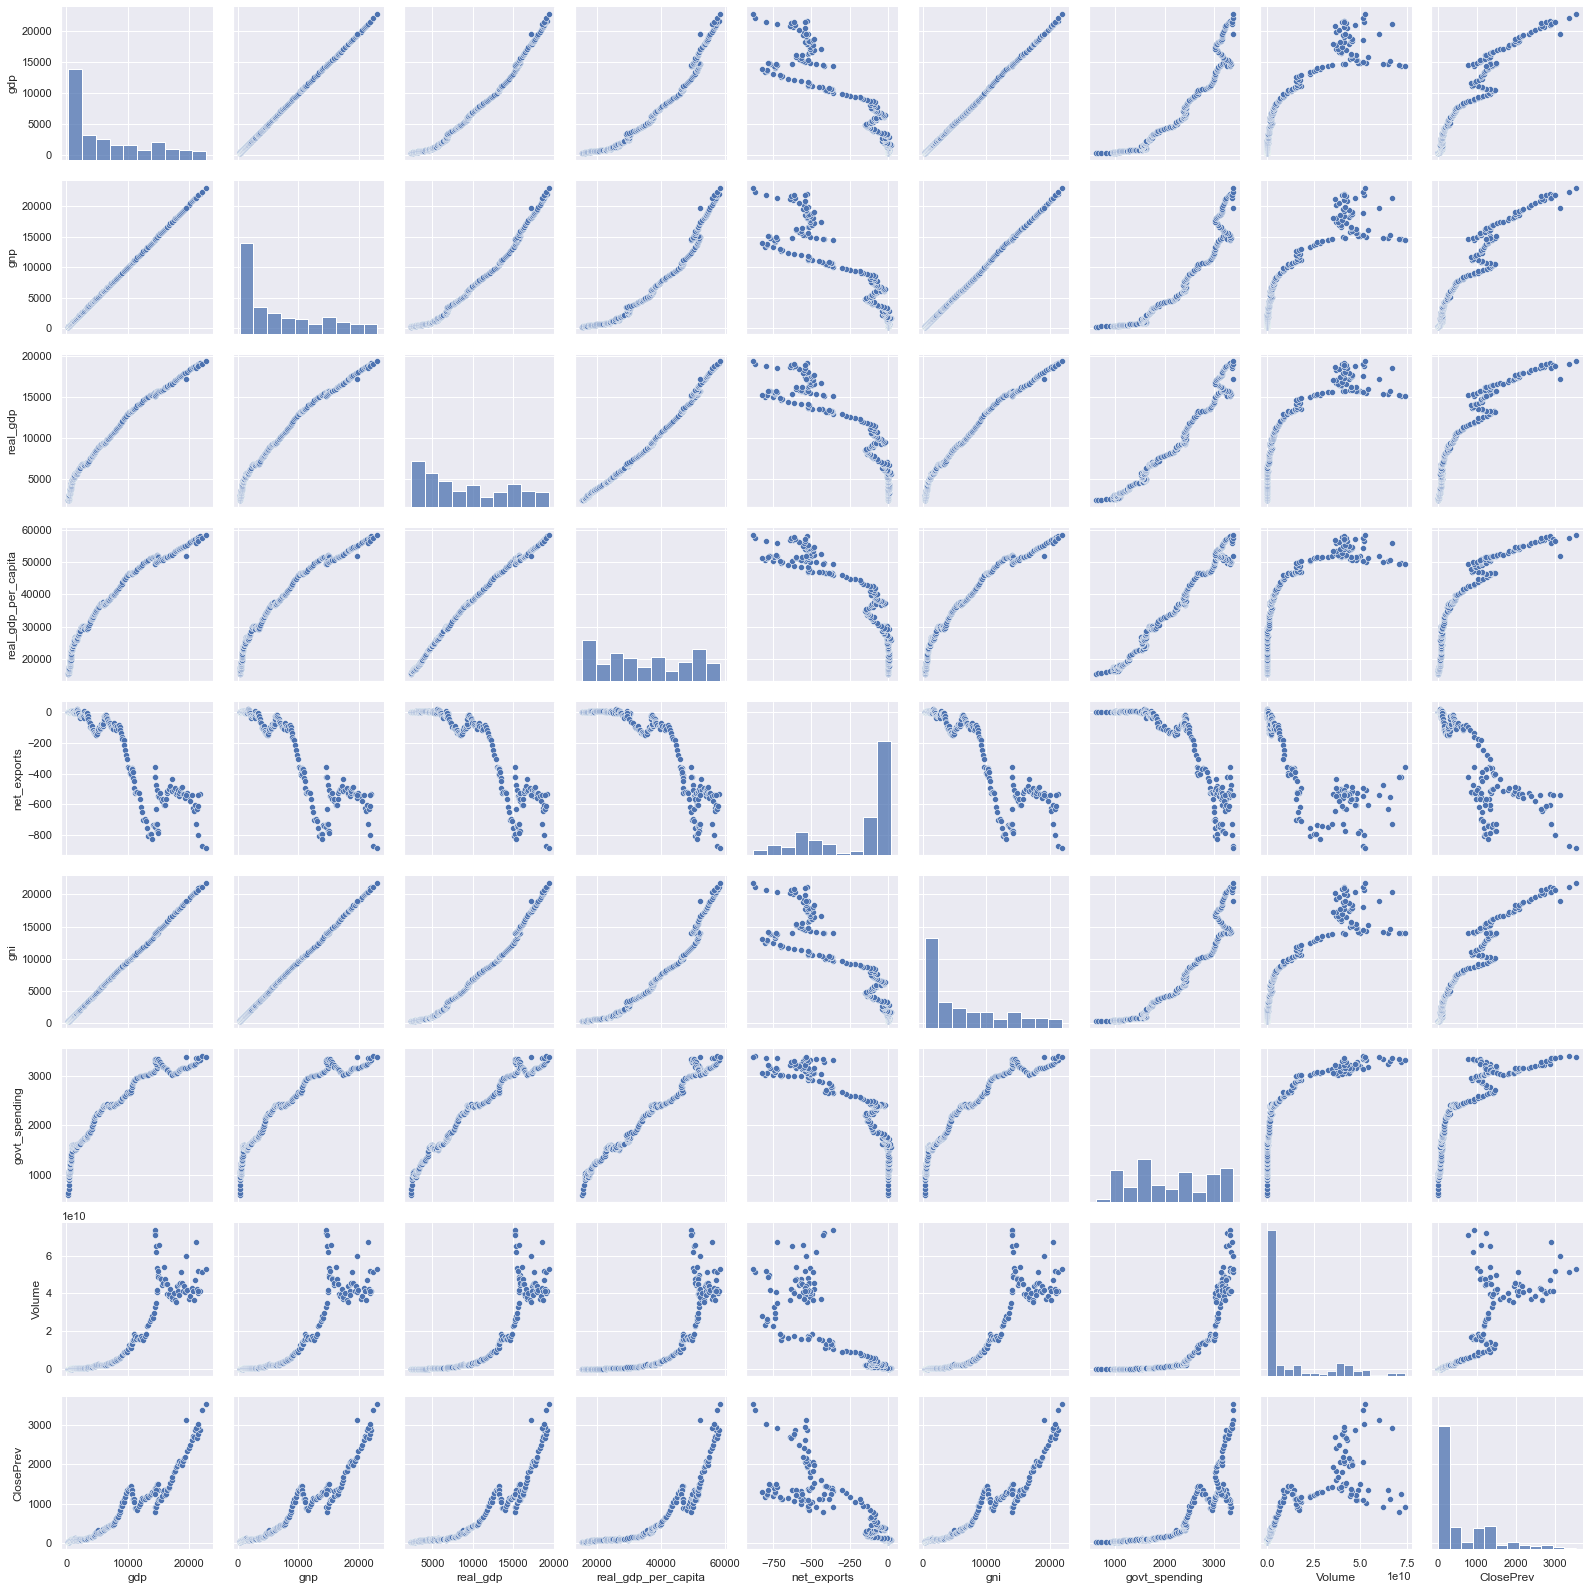

In [35]:
sns.pairplot(data = df_full[['gdp', 'gnp', 'real_gdp','real_gdp_per_capita','net_exports','gni','govt_spending', 'Volume','ClosePrev']])

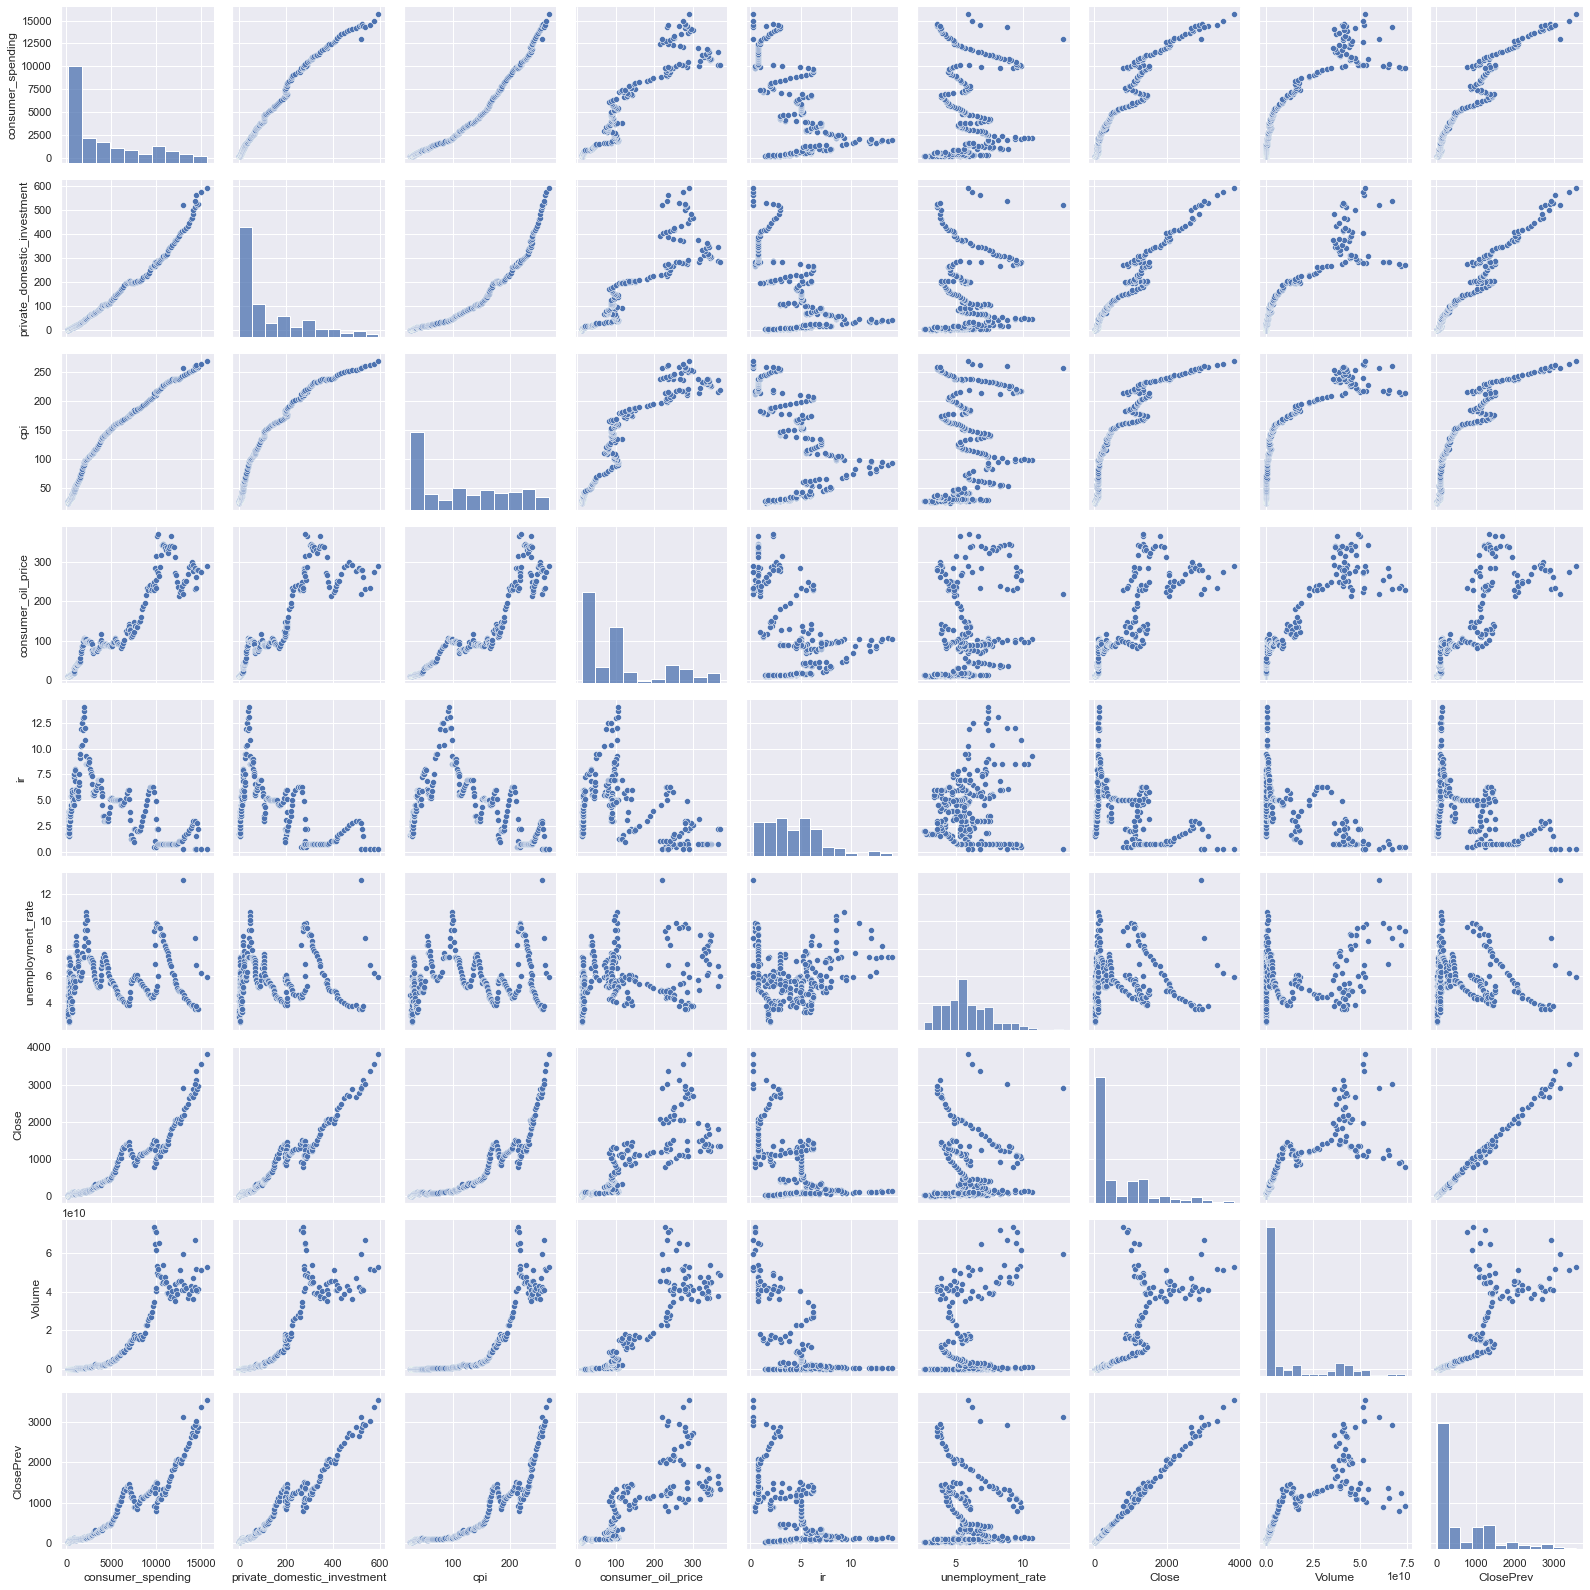

In [36]:
sns.pairplot(data = df_full[['consumer_spending','private_domestic_investment','cpi','consumer_oil_price','ir','unemployment_rate','Close','Volume','ClosePrev']])

### Box Plots (Split up due to difference in scale)

<AxesSubplot:>

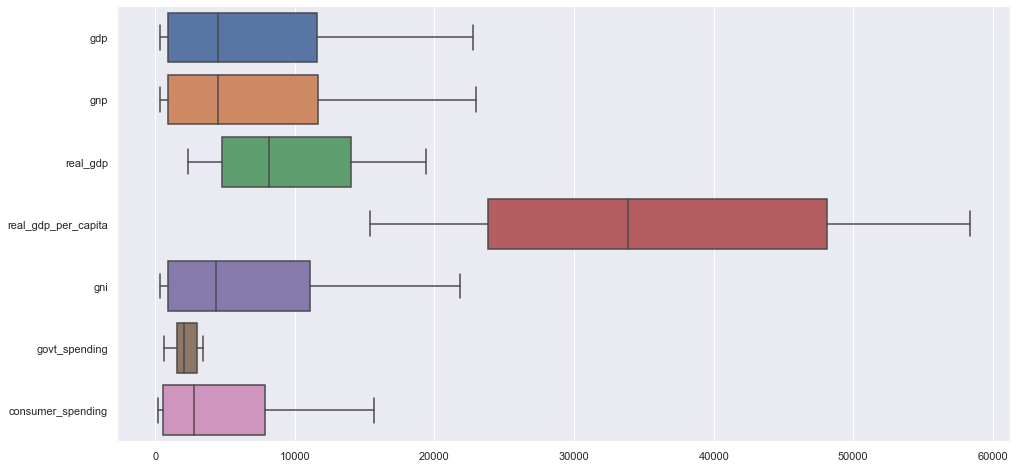

In [26]:
f = plt.figure(figsize=(16, 8))
sns.boxplot(data = df_full[['gdp', 'gnp', 'real_gdp', 'real_gdp_per_capita', 'gni', 'govt_spending', 'consumer_spending']], orient = "h")

<AxesSubplot:>

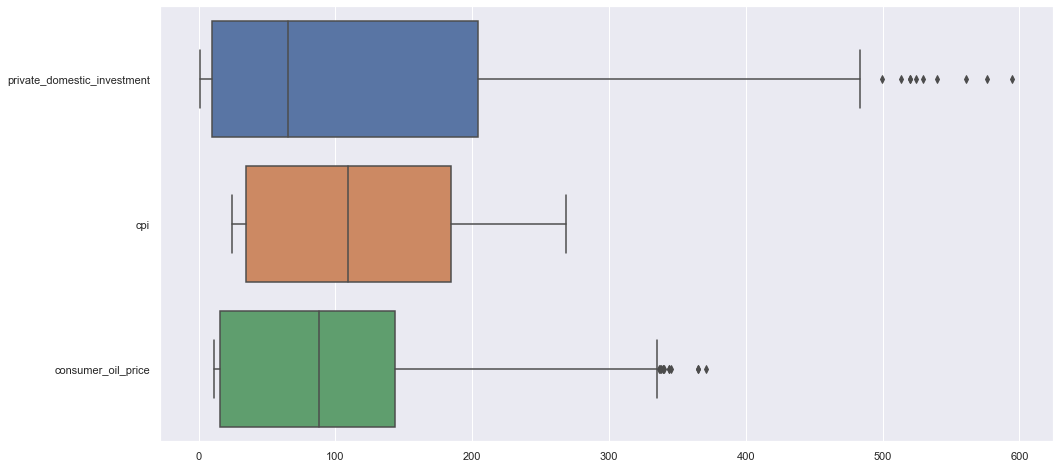

In [27]:
f = plt.figure(figsize=(16, 8))
sns.boxplot(data = df_full[['private_domestic_investment','cpi','consumer_oil_price']], orient = "h")

<AxesSubplot:>

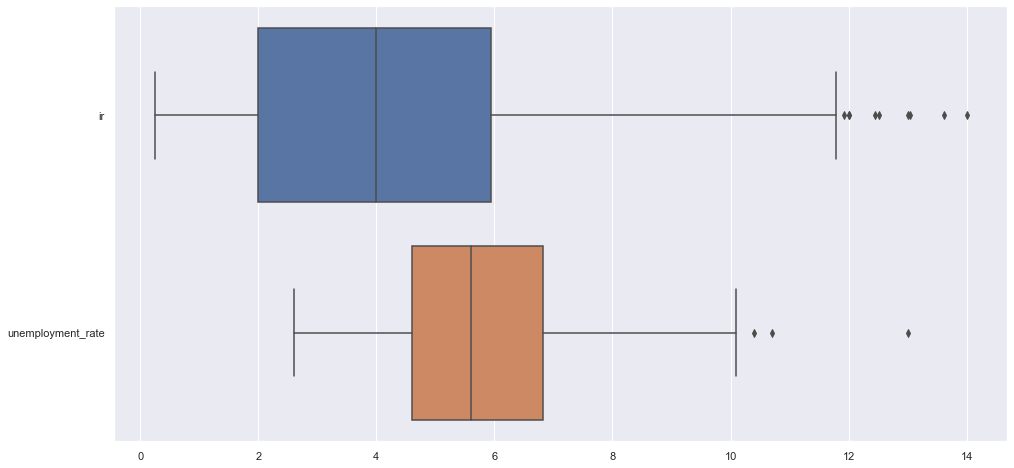

In [28]:
f = plt.figure(figsize=(16, 8))
sns.boxplot(data = df_full[['ir','unemployment_rate']], orient = "h")

<AxesSubplot:>

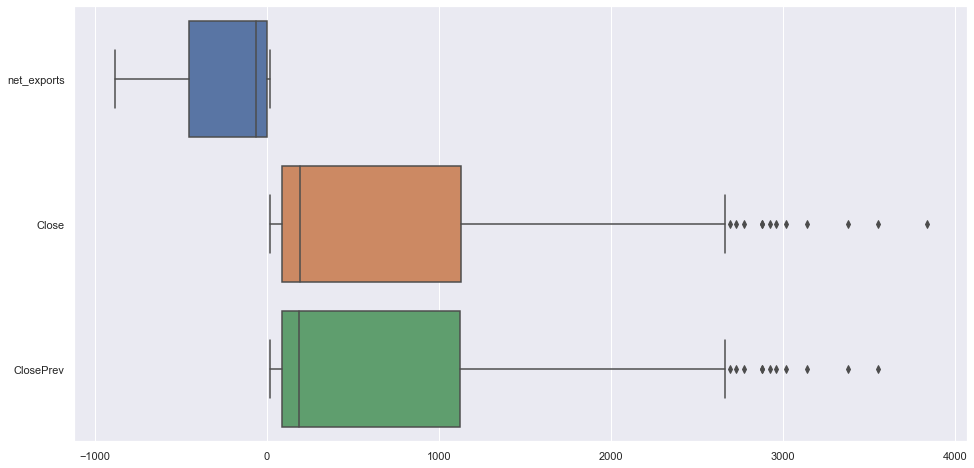

In [29]:
f = plt.figure(figsize=(16, 8))
sns.boxplot(data = df_full[['net_exports', 'Close', 'ClosePrev']], orient = "h")

<AxesSubplot:>

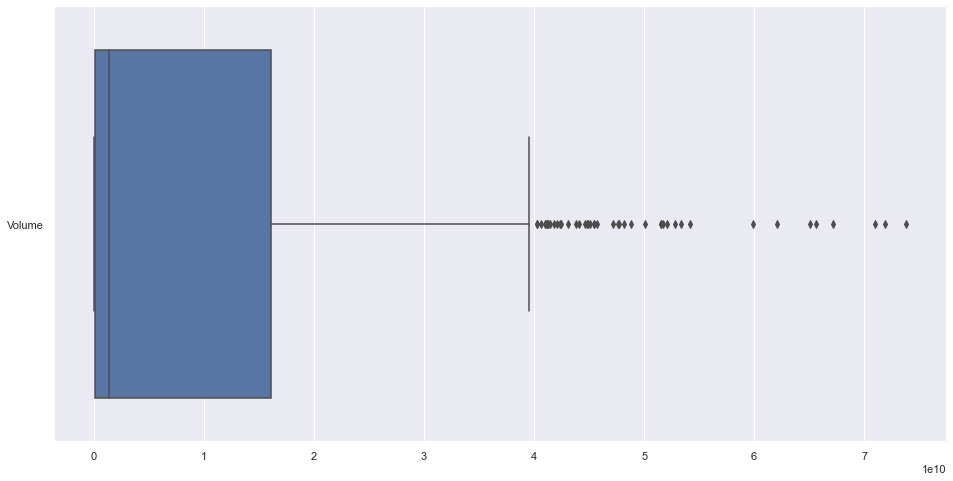

In [30]:
f = plt.figure(figsize=(16, 8))
sns.boxplot(data = df_full[['Volume']], orient = "h")

### Time-Series Plot

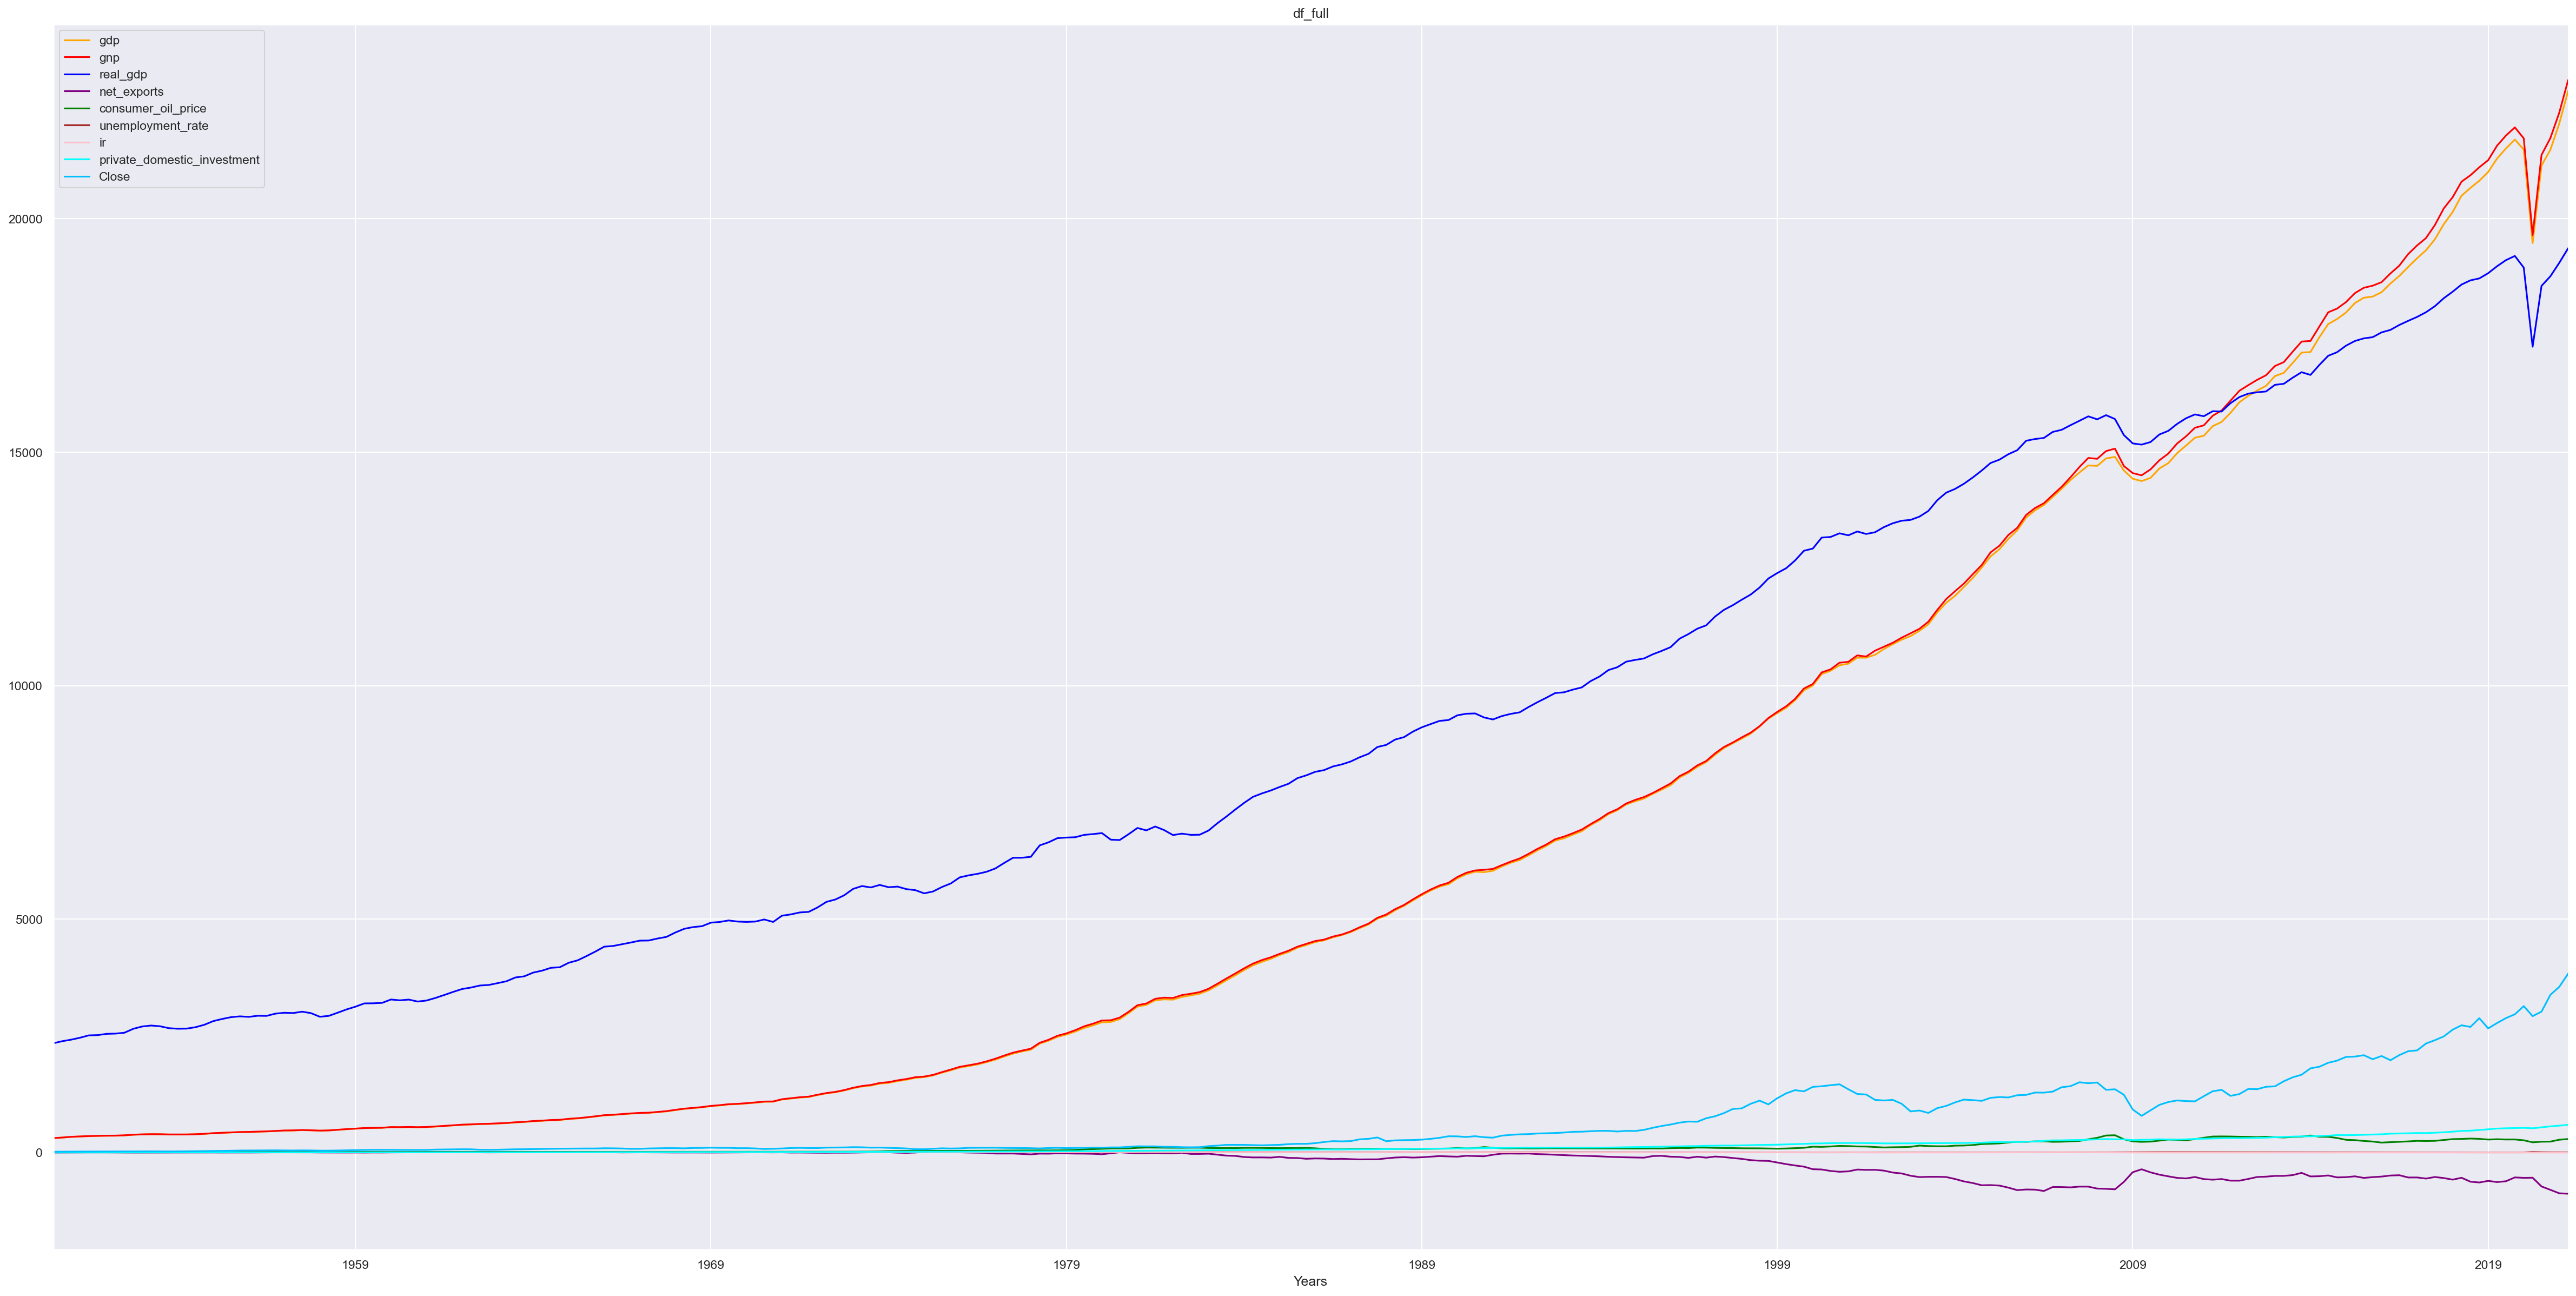

In [11]:
# to set the plot size
plt.figure(figsize=(40, 20), dpi=150)
  
# in plot method we set the label and color of the curve.
df_full['gdp'].plot(label='gdp', color='orange')
df_full['gnp'].plot(label='gnp', color='red')
df_full['real_gdp'].plot(label='real_gdp', color='blue')
df_full['net_exports'].plot(label='net_exports', color='purple')
df_full['consumer_oil_price'].plot(label='consumer_oil_price', color='green')
df_full['unemployment_rate'].plot(label='unemployment_rate', color='brown')
df_full['ir'].plot(label='ir', color='pink')
df_full['private_domestic_investment'].plot(label='private_domestic_investment', color='cyan')
df_full['Close'].plot(label='Close', color='deepskyblue')
  
# adding title to the plot
plt.title('df_full')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

### Correlation Matrix

<AxesSubplot:>

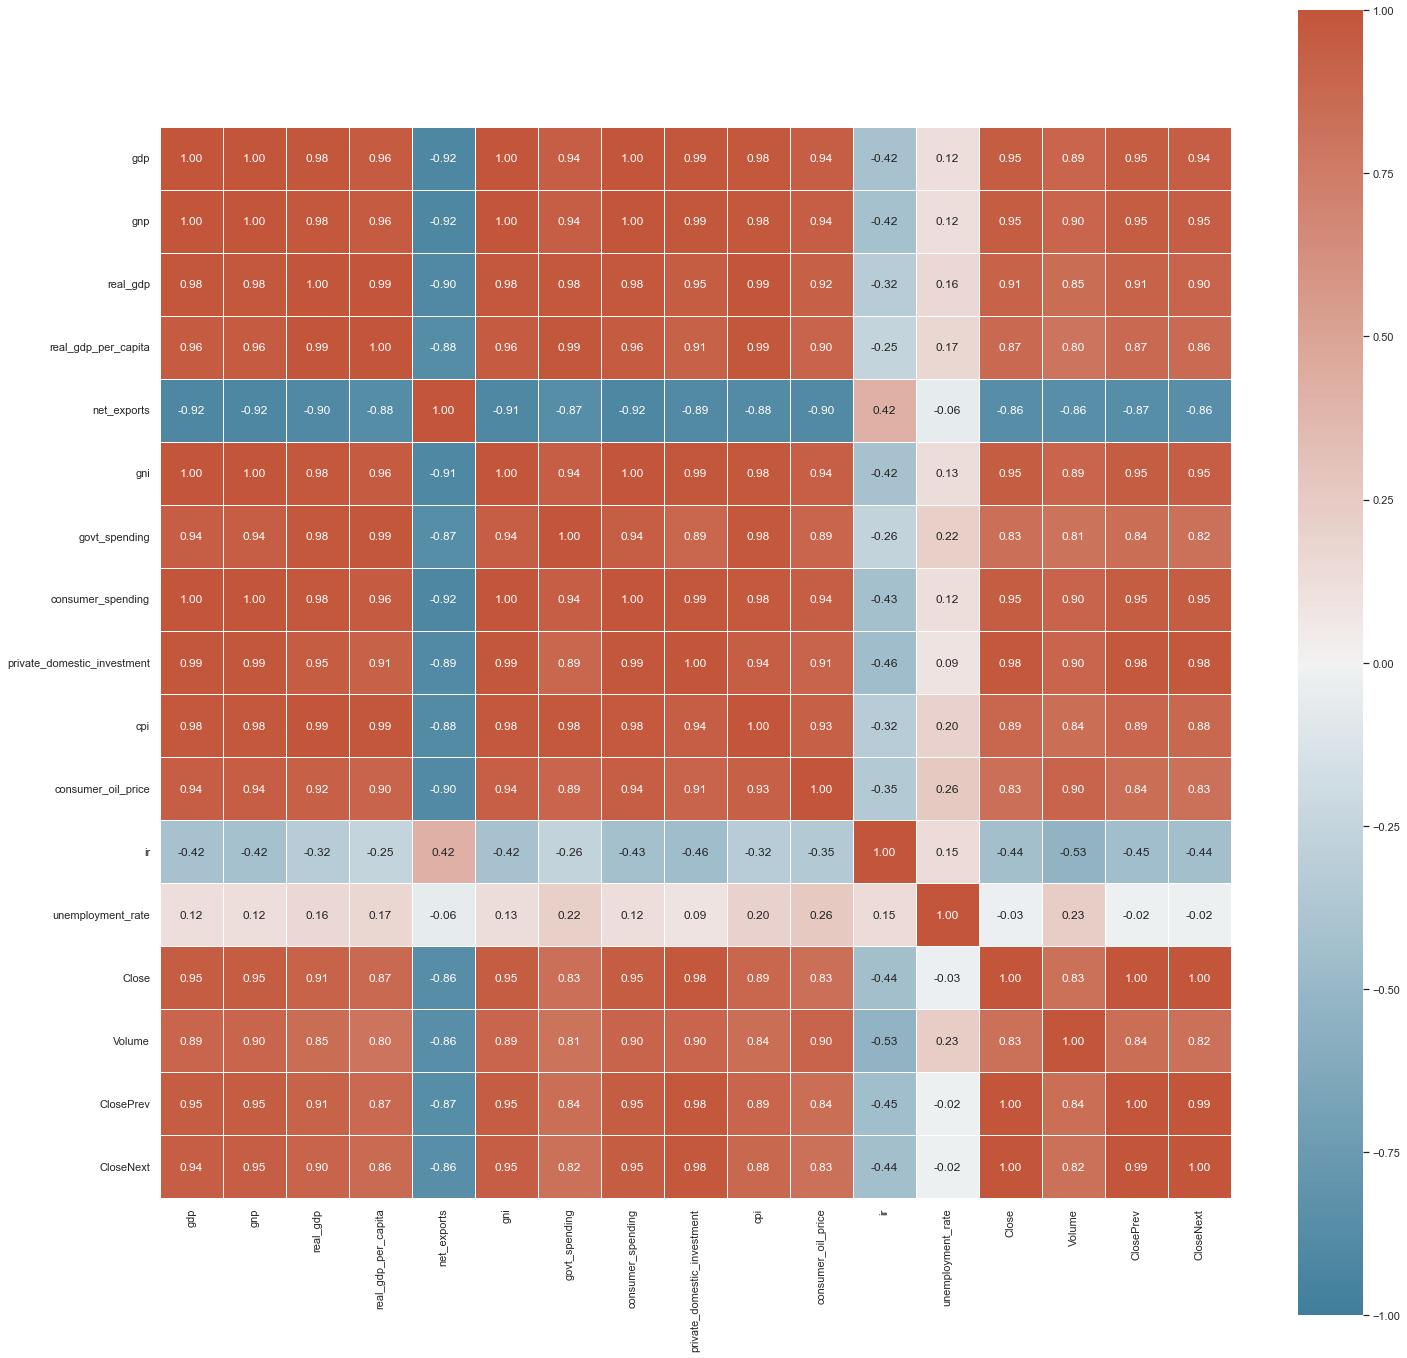

In [20]:
f, axes = plt.subplots(1,1,figsize=(24,24))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_full.corr(), vmin=-1, vmax=1, cmap=cmap, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5)

# Analytic Visualization

## 5) De-Trending

In [18]:
# pecentage change
df_pct_change = pd.DataFrame()
for column in df_full:
    df_pct_change['%'+column] = df_full[column].pct_change()
df_pct_change = df_pct_change.dropna()

# absolute difference
df_diff = pd.DataFrame()
for column in df_full:
    df_diff['DIFF_'+column] = df_full[column].diff()
df_diff = df_diff.dropna()

# link relatives
df_shift = df_full.shift(1)
df_lr = pd.DataFrame()
for column in df_full:
    df_lr['LR_'+column] = df_full[column].div(df_shift[column])
df_lr = df_lr.dropna()

### Absolute Difference

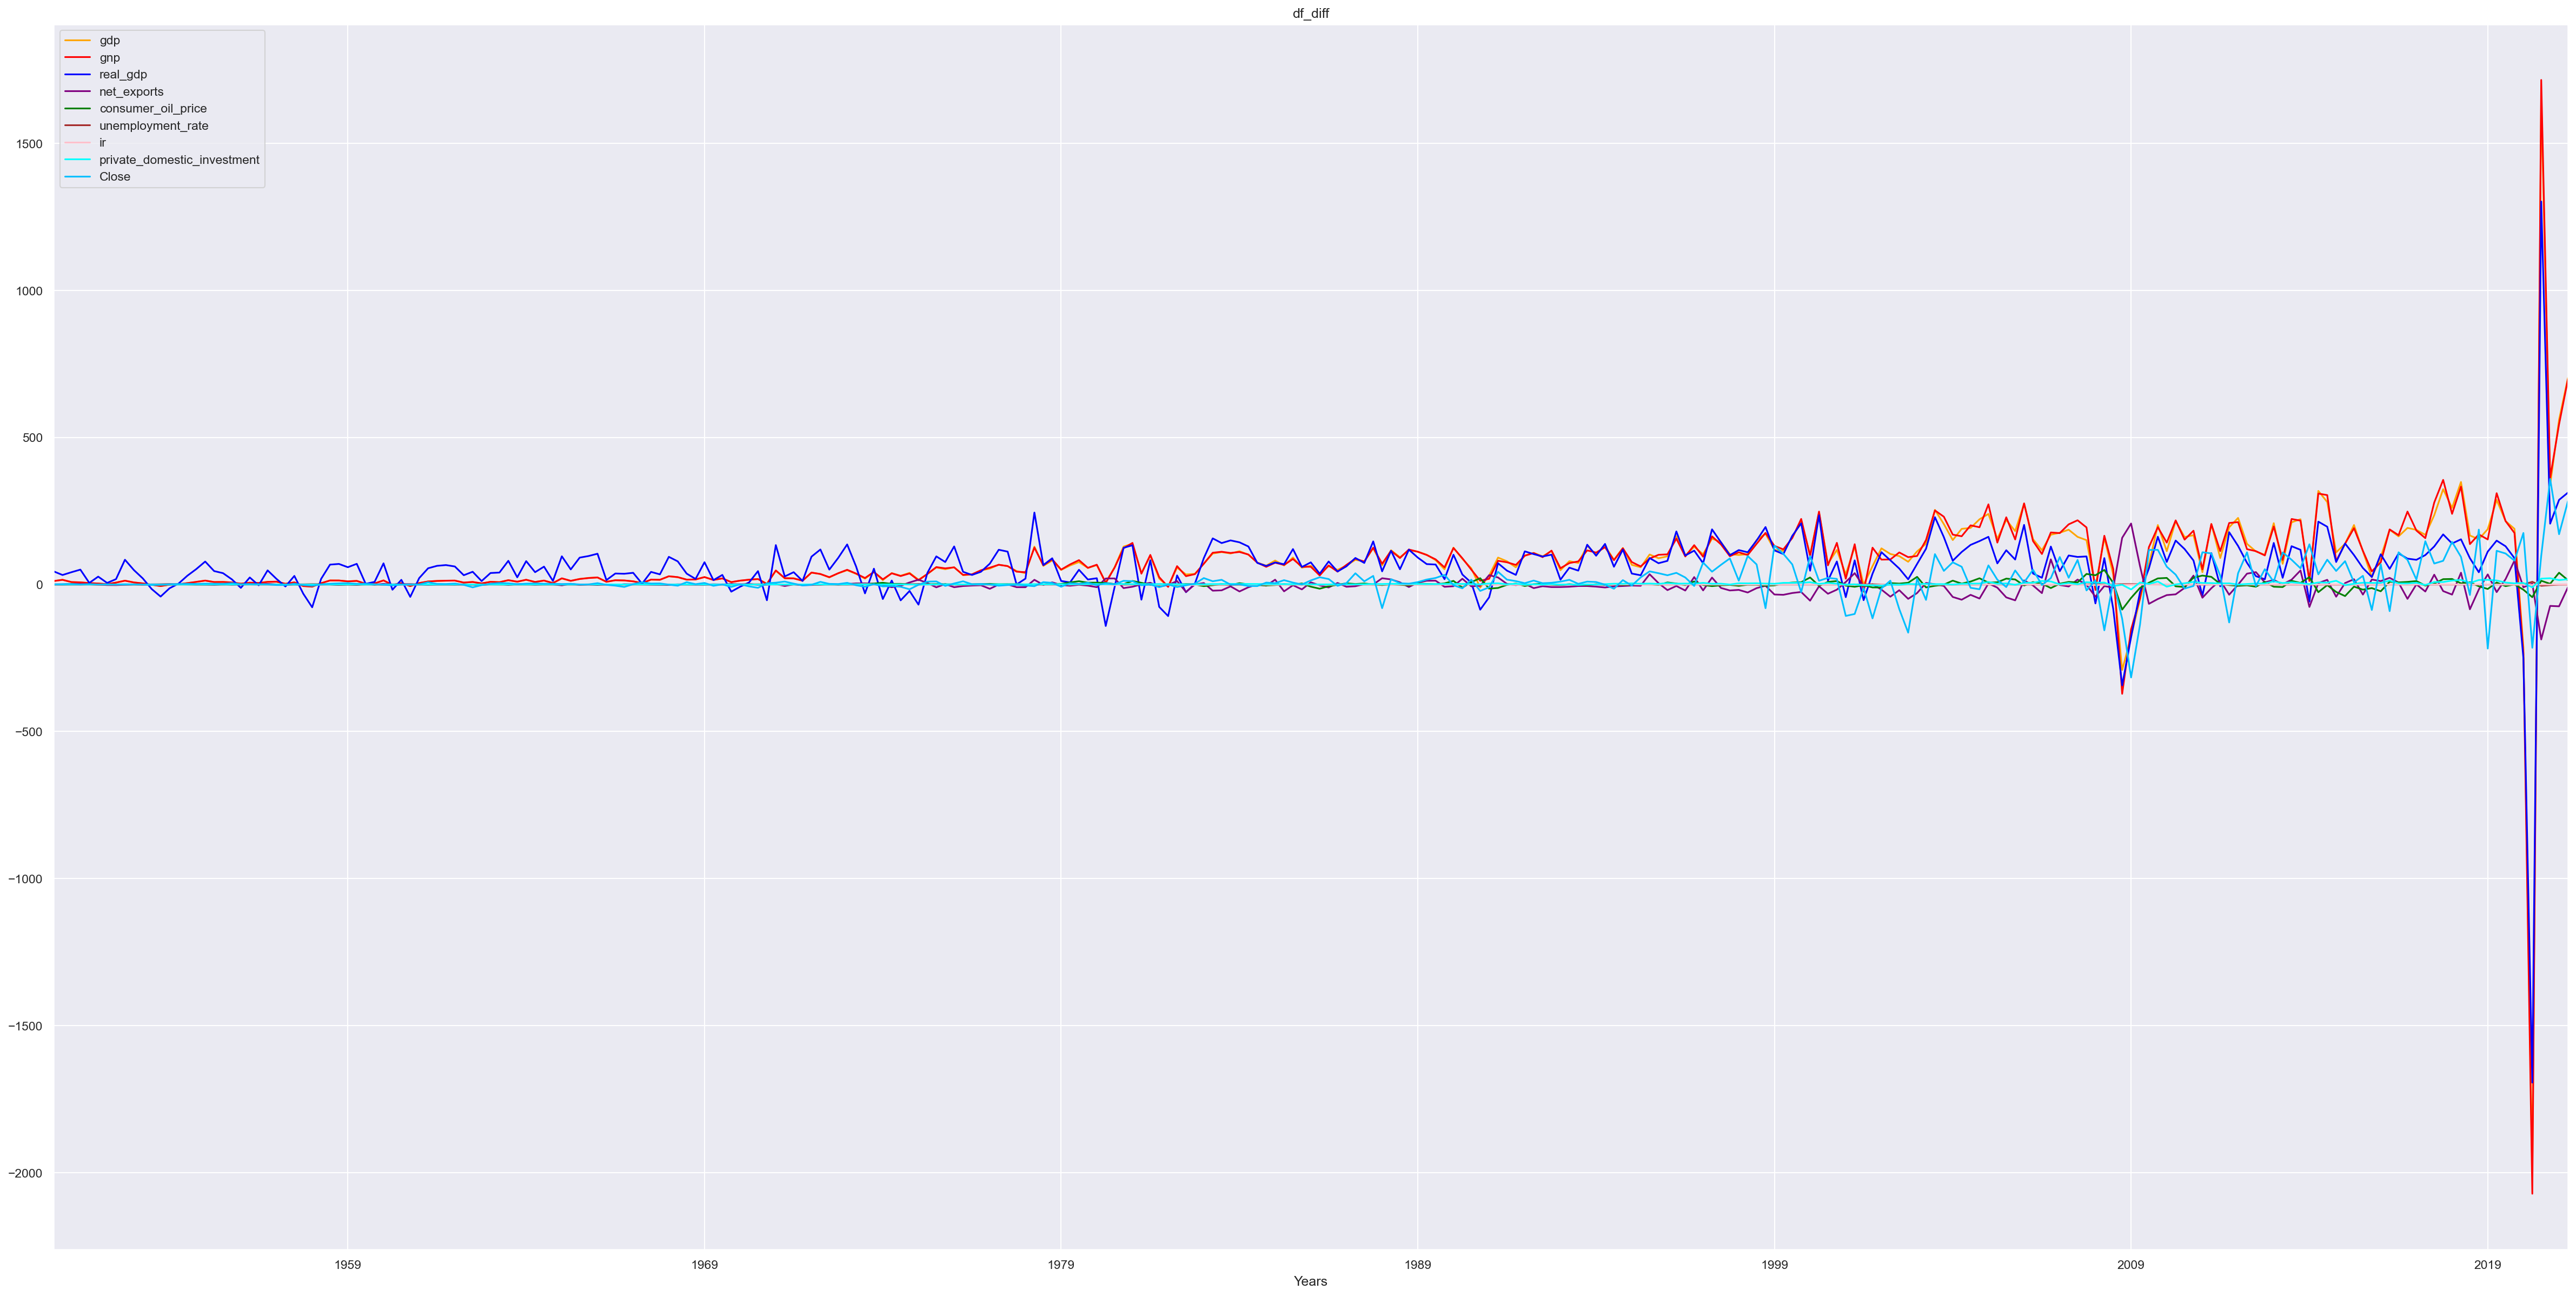

In [14]:
# to set the plot size
plt.figure(figsize=(40, 20), dpi=150)
  
# in plot method we set the label and color of the curve.
df_diff['DIFF_gdp'].plot(label='gdp', color='orange')
df_diff['DIFF_gnp'].plot(label='gnp', color='red')
df_diff['DIFF_real_gdp'].plot(label='real_gdp', color='blue')
df_diff['DIFF_net_exports'].plot(label='net_exports', color='purple')
df_diff['DIFF_consumer_oil_price'].plot(label='consumer_oil_price', color='green')
df_diff['DIFF_unemployment_rate'].plot(label='unemployment_rate', color='brown')
df_diff['DIFF_ir'].plot(label='ir', color='pink')
df_diff['DIFF_private_domestic_investment'].plot(label='private_domestic_investment', color='cyan')
df_diff['DIFF_Close'].plot(label='Close', color='deepskyblue')
  
# adding title to the plot
plt.title('df_diff')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

### Percentage Change

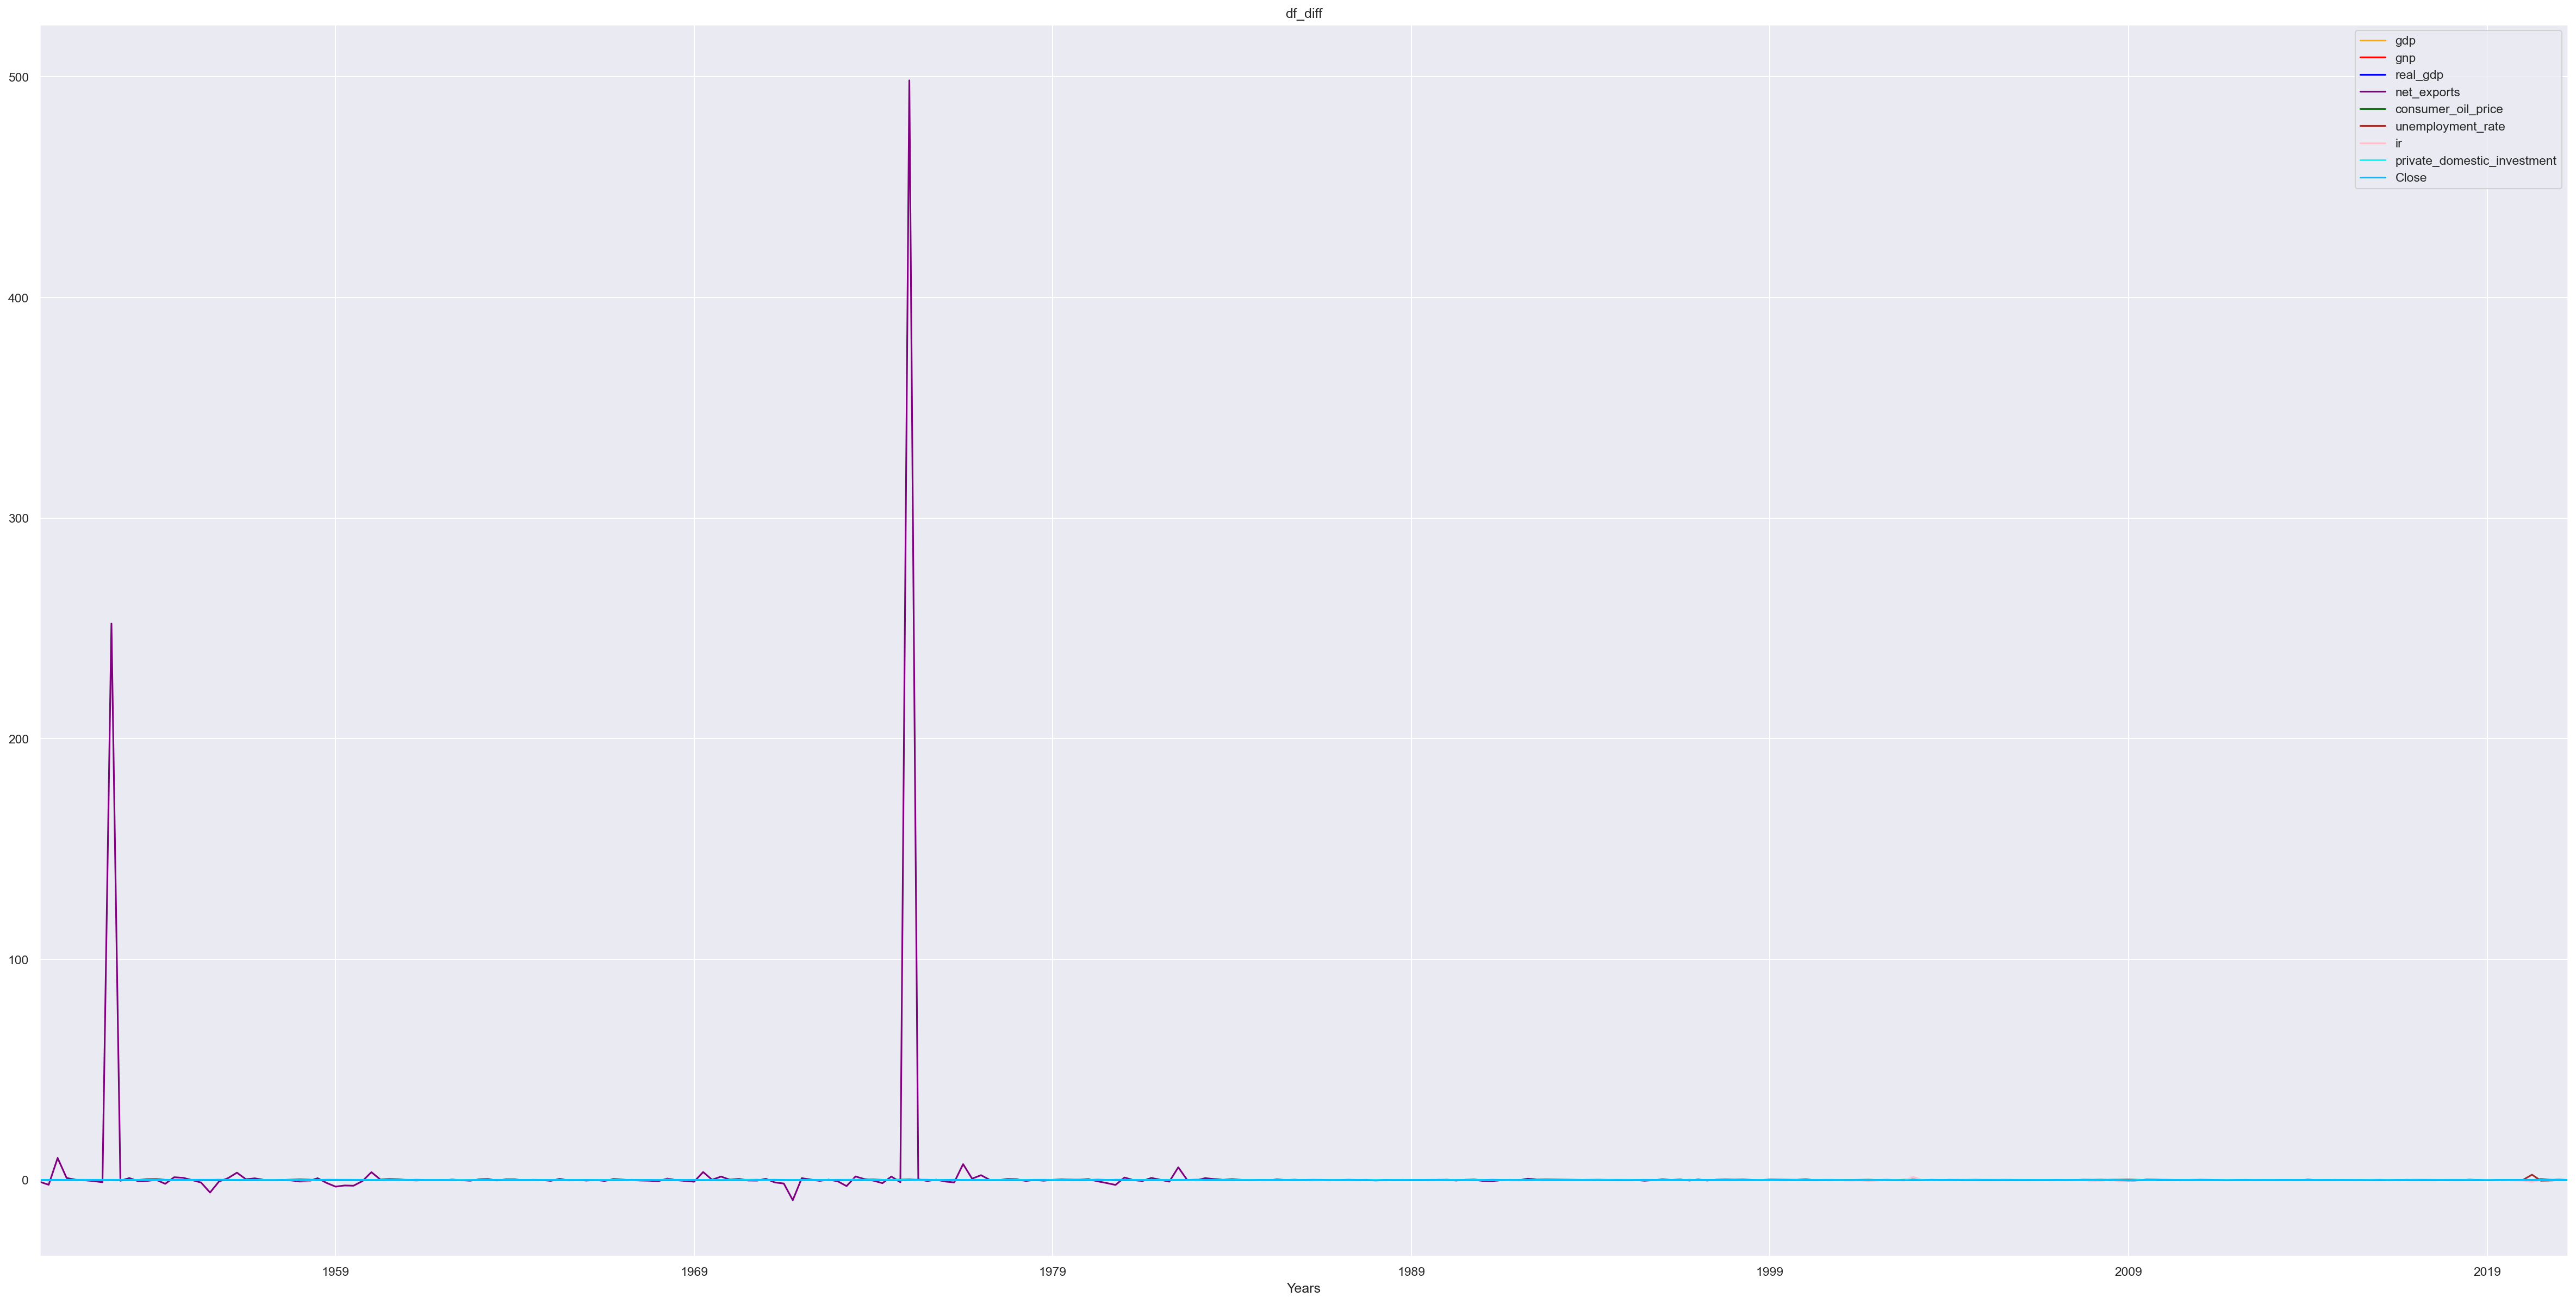

In [15]:
# to set the plot size
plt.figure(figsize=(40, 20), dpi=150)
  
# in plot method we set the label and color of the curve.
df_pct_change['%gdp'].plot(label='gdp', color='orange')
df_pct_change['%gnp'].plot(label='gnp', color='red')
df_pct_change['%real_gdp'].plot(label='real_gdp', color='blue')
df_pct_change['%net_exports'].plot(label='net_exports', color='purple')
df_pct_change['%consumer_oil_price'].plot(label='consumer_oil_price', color='green')
df_pct_change['%unemployment_rate'].plot(label='unemployment_rate', color='brown')
df_pct_change['%ir'].plot(label='ir', color='pink')
df_pct_change['%private_domestic_investment'].plot(label='private_domestic_investment', color='cyan')
df_pct_change['%Close'].plot(label='Close', color='deepskyblue')
  
# adding title to the plot
plt.title('df_pct_change')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

### Link Relatives

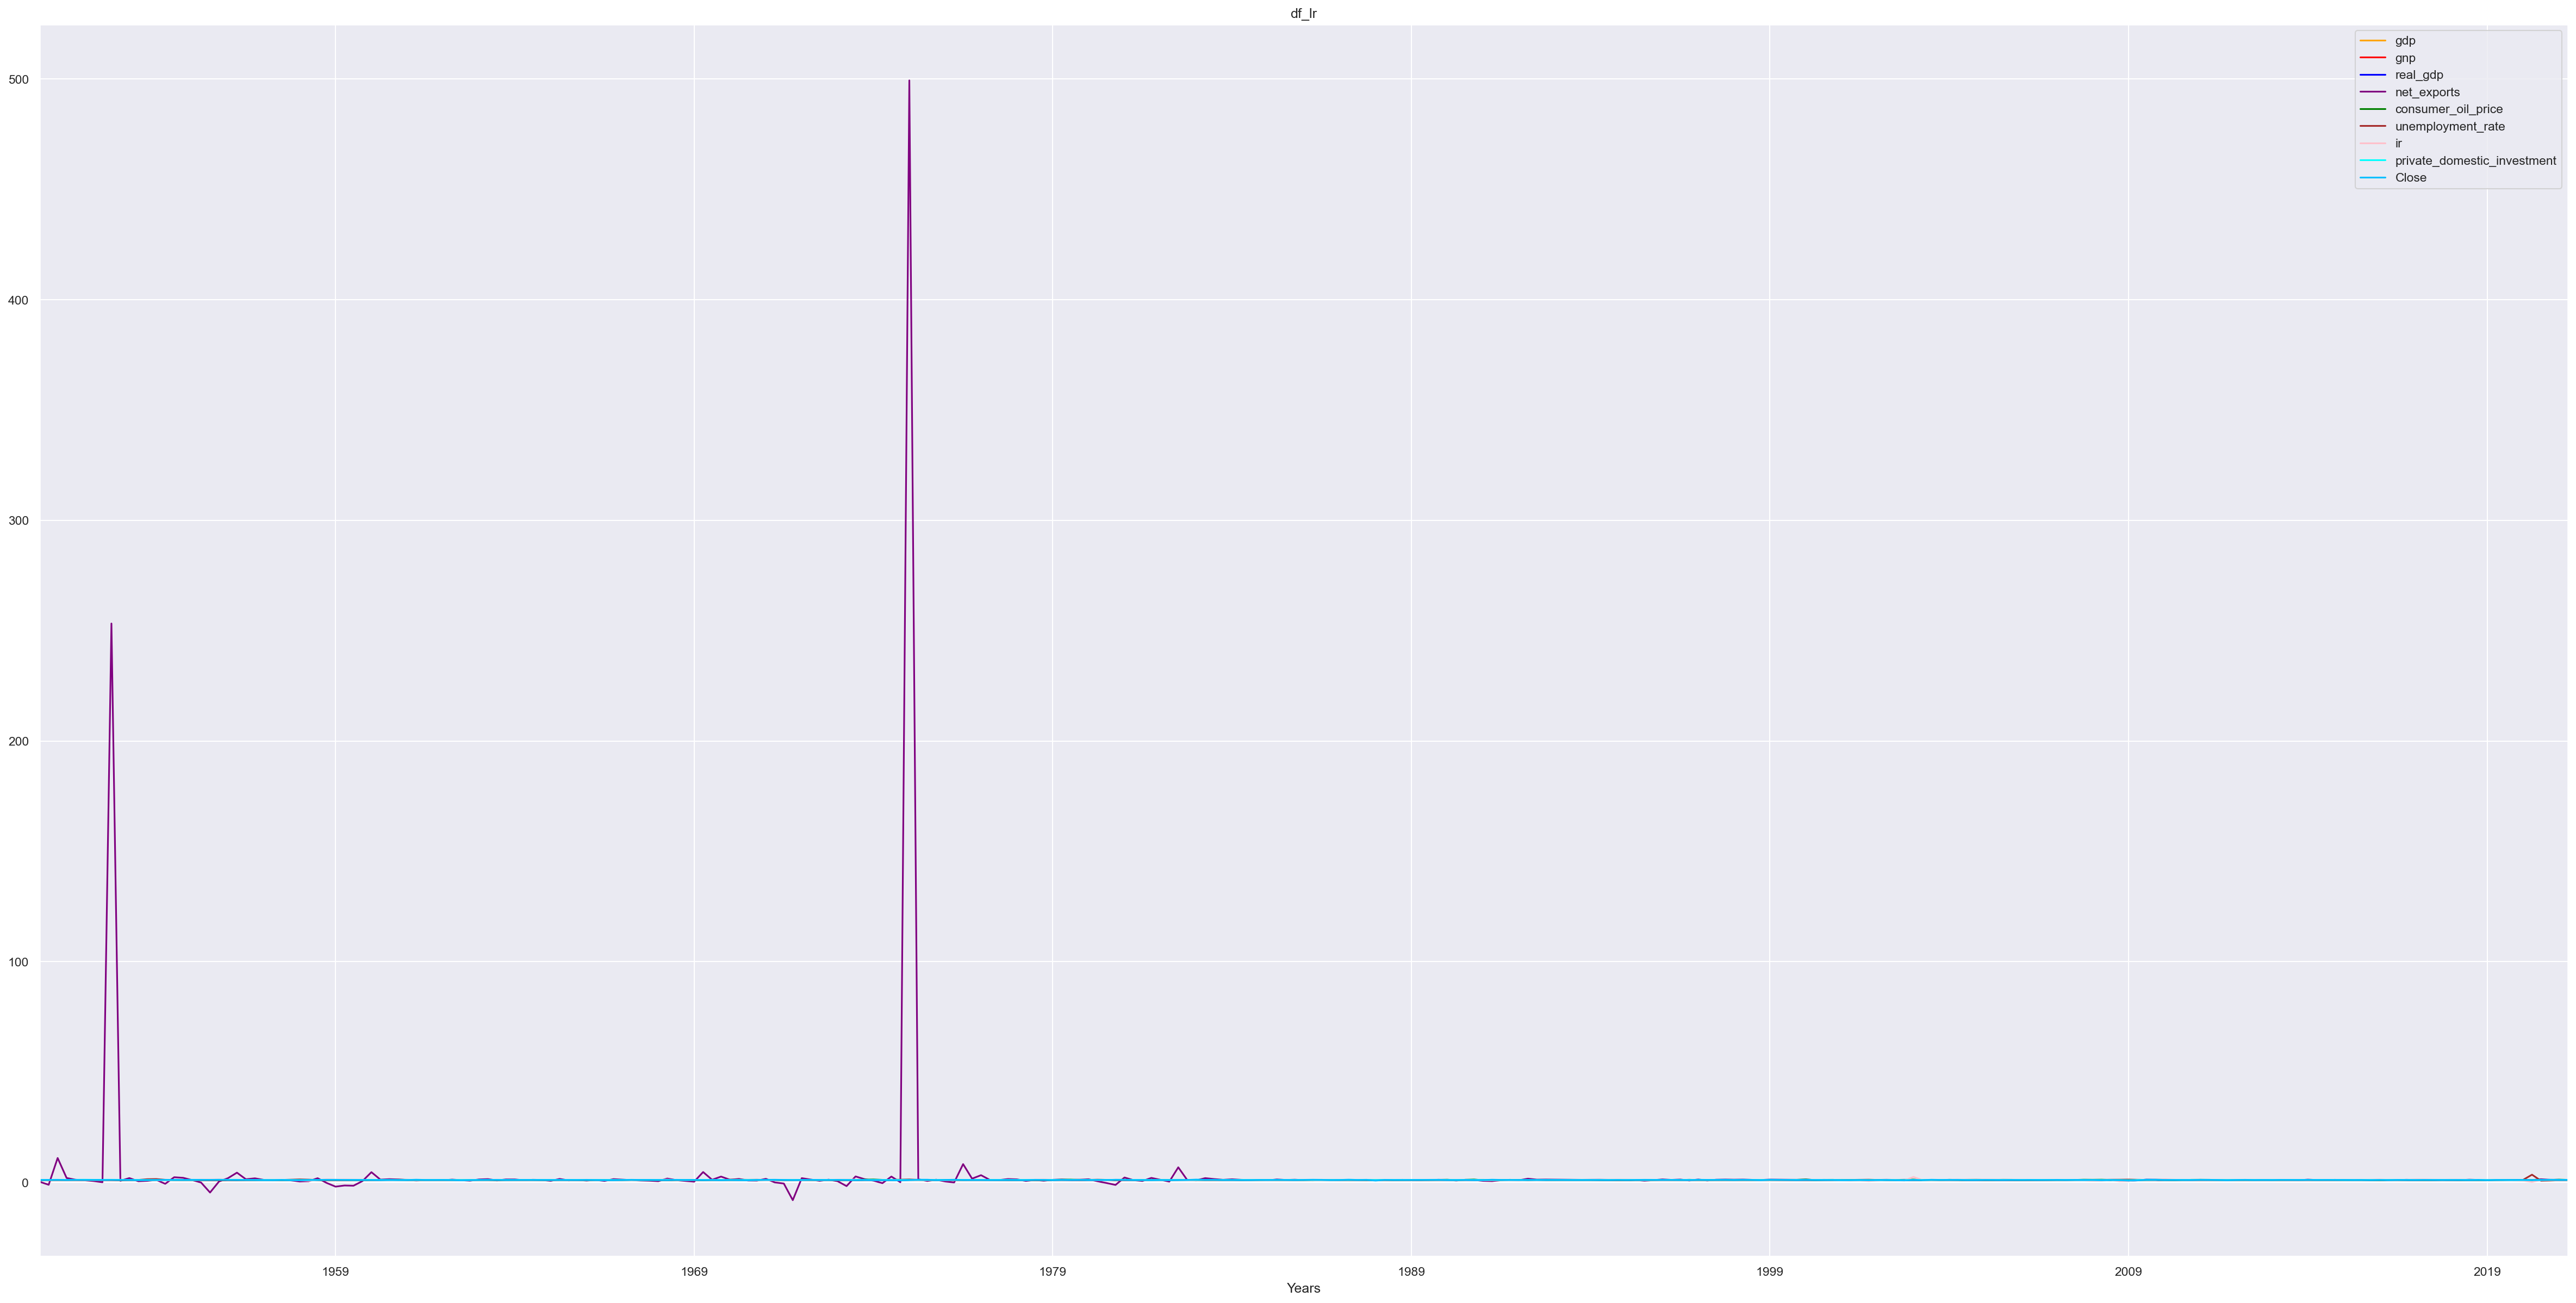

In [16]:
# to set the plot size
plt.figure(figsize=(40, 20), dpi=150)
  
# in plot method we set the label and color of the curve.
df_lr['LR_gdp'].plot(label='gdp', color='orange')
df_lr['LR_gnp'].plot(label='gnp', color='red')
df_lr['LR_real_gdp'].plot(label='real_gdp', color='blue')
df_lr['LR_net_exports'].plot(label='net_exports', color='purple')
df_lr['LR_consumer_oil_price'].plot(label='consumer_oil_price', color='green')
df_lr['LR_unemployment_rate'].plot(label='unemployment_rate', color='brown')
df_lr['LR_ir'].plot(label='ir', color='pink')
df_lr['LR_private_domestic_investment'].plot(label='private_domestic_investment', color='cyan')
df_lr['LR_Close'].plot(label='Close', color='deepskyblue')
  
# adding title to the plot
plt.title('df_lr')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

## 6) Final Correlation Dataframe

In [19]:
df_full_new = pd.concat([df_full, df_pct_change, df_diff, df_lr], axis=1)
df_full_new = df_full_new.dropna()

corr = df_full_new.corr()
corr.to_csv("results/correlation..csv")
print("The Whole Correlation Matrix")
display(corr)

List = []
for i in range(17):
    Sum = abs(corr["%CloseNext"][17+i]) + abs(corr["DIFF_CloseNext"][34+i]) + abs(corr["LR_CloseNext"][51+i])
    avg = Sum/3
    List.append(avg)

corr = pd.DataFrame(corr["CloseNext"])
corr = corr.head(17)
corr["CloseNext (detrend)"] = List

print("All correlations to 'CloseNext'")
display(pd.DataFrame(corr.sort_values(by = 'CloseNext', key=abs, ascending=False)['CloseNext']))
print("\nAll correlations to 'CloseNext' after de-trending")
display(pd.DataFrame(corr.sort_values(by = 'CloseNext (detrend)', key=abs, ascending=False)['CloseNext (detrend)']))

The Whole Correlation Matrix


,gdp,gnp,real_gdp,real_gdp_per_capita,net_exports,gni,govt_spending,consumer_spending,private_domestic_investment,cpi,...,LR_consumer_spending,LR_private_domestic_investment,LR_cpi,LR_consumer_oil_price,LR_ir,LR_unemployment_rate,LR_Close,LR_Volume,LR_ClosePrev,LR_CloseNext
gdp,1.000000,0.999984,0.984531,0.960796,-0.917237,0.999866,0.943296,0.999779,0.986188,0.978617,...,-0.243836,-0.269005,-0.250519,-0.021556,-0.056381,0.036629,0.018873,-0.048824,0.009268,0.025642
gnp,0.999984,1.000000,0.983937,0.959826,-0.916641,0.999874,0.942230,0.999823,0.986571,0.977939,...,-0.243620,-0.268321,-0.250096,-0.021282,-0.055983,0.036232,0.019065,-0.049424,0.009422,0.025817
real_gdp,0.984531,0.983937,1.000000,0.994201,-0.904937,0.984321,0.982064,0.981935,0.949683,0.992527,...,-0.210208,-0.295425,-0.192296,0.002007,-0.051441,0.022345,0.006254,-0.037882,-0.001265,0.009370
real_gdp_per_capita,0.960796,0.959826,0.994201,1.000000,-0.882381,0.960622,0.990872,0.956553,0.914387,0.987958,...,-0.185000,-0.299301,-0.153054,0.015525,-0.048881,0.010913,0.002951,-0.031748,-0.002550,0.002476
net_exports,-0.917237,-0.916641,-0.904937,-0.882381,1.000000,-0.910600,-0.872842,-0.920515,-0.892082,-0.884643,...,0.207594,0.246261,0.231553,-0.066605,0.016236,-0.013455,0.013098,0.034038,0.016504,0.030954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LR_unemployment_rate,0.036629,0.036232,0.022345,0.010913,-0.013455,0.037451,0.042408,0.035396,0.067965,0.035546,...,-0.630669,-0.221115,-0.093444,-0.200346,-0.448152,1.000000,-0.214290,0.166371,-0.114507,-0.053700
LR_Close,0.018873,0.019065,0.006254,0.002951,0.013098,0.020119,-0.010354,0.017757,0.024251,0.021900,...,0.168481,0.118486,-0.076879,0.068194,0.189943,-0.214290,1.000000,0.159729,0.234349,0.237811
LR_Volume,-0.048824,-0.049424,-0.037882,-0.031748,0.034038,-0.049259,-0.026931,-0.050580,-0.048557,-0.037516,...,-0.051127,-0.124280,-0.031384,-0.110365,-0.152209,0.166371,0.159729,1.000000,-0.074328,0.051312
LR_ClosePrev,0.009268,0.009422,-0.001265,-0.002550,0.016504,0.010294,-0.021422,0.007078,0.013980,0.012575,...,0.018989,0.131264,-0.112704,0.039263,0.048924,-0.114507,0.234349,-0.074328,1.000000,0.035215


All correlations to 'CloseNext'


,CloseNext
CloseNext,1.000000
Close,0.997446
ClosePrev,0.994099
private_domestic_investment,0.978368
consumer_spending,0.945604
gni,0.945140
gnp,0.945078
gdp,0.944850
real_gdp,0.901008
cpi,0.882512



All correlations to 'CloseNext' after de-trending


,CloseNext (detrend)
CloseNext,1.000000
real_gdp,0.260004
Close,0.256138
real_gdp_per_capita,0.255362
consumer_spending,0.251089
gnp,0.241813
gdp,0.239260
gni,0.232550
private_domestic_investment,0.222579
net_exports,0.167888


<b>Highly correlated features to be ignored</b> - ClosePrev, Close, CloseNext<br />

<b>Features with highest correlation: (before de-trending)</b><br />
    - ['private_domestic_investment', 'consumer_spending', 'gni', 'gnp', 'gdp', 'real_gdp', 'cpi']              
<b>Features with highest correlation: (after de-trending)</b><br />
    - ['real_gdp', 'real_gdp_per_capita', 'consumer_spending', 'gnp', 'gdp', 'gni', 'private_domestic_investment']